In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
file=pd.read_csv('C:\\Users\\lenovo\\Desktop\\csv\\houseprice.csv')
file.dropna(inplace=True)
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [23]:
file.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## finding the outliers

<Axes: ylabel='Area'>

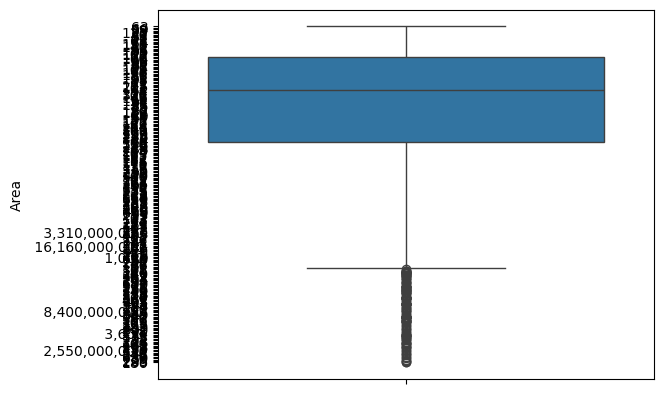

In [24]:
sns.boxplot(file['Area'])

In [25]:
file['Area'] = pd.to_numeric(file['Area'].astype(str).str.strip(), errors='coerce')
upper_limit=file["Area"].mean()+3*file["Area"].std()
lower_limit=file["Area"].mean()-3*file["Area"].std()
print(upper_limit)
print(lower_limit)

315.57031798480716
-101.73553537611153


In [34]:
new_file=file.loc[(file['Area']<upper_limit) & (file['Area']>lower_limit)]
new_file.dropna()
print(len(file))
print(len(new_file))
print('len(file) - len(new_file) =  ' , len(file) - len(new_file))

3456
3395
len(file) - len(new_file) =   61


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_file['Address_encoded'] = le.fit_transform(new_file['Address'])
new_file['Warehouse']=new_file['Warehouse'].astype(int)
new_file['Elevator']=new_file['Elevator'].astype(int)

new_file['Parking']=new_file['Parking'].astype(int)
new_file

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6484\2985917113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_file['Address_encoded'] = le.fit_transform(new_file['Address'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6484\2985917113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_file['Warehouse']=new_file['Warehouse'].astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6484\2985917113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_encoded
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67,154
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67,154
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33,115
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,150
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,148
...,...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67,161
3475,83.0,2,1,1,1,Niavaran,6.800000e+09,226666.67,103
3476,75.0,2,0,0,0,Parand,3.650000e+08,12166.67,113
3477,105.0,2,1,1,1,Dorous,5.600000e+09,186666.67,38


In [37]:
x = new_file[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address_encoded']]  
y = new_file['Price'] 
y_USD=new_file['Price(USD)']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

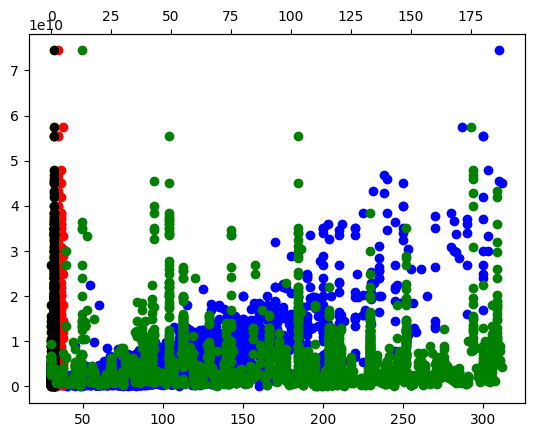

In [59]:
fig, ax = plt.subplots()
ay = ax.twiny()

ax.scatter(new_file['Area'], new_file['Price'] , color='blue')
ay.scatter(new_file['Room'], new_file['Price'], color='red')
ay.scatter(new_file['Parking'], new_file['Price'], color='yellow')
ay.scatter(new_file['Warehouse'], new_file['Price'], color='black')
ay.scatter(new_file['Address_encoded'], new_file['Price'], color='green')

plt.show()

Mean Squared Error (MSE): 1.2809167367854002e+19
R^2 Score: 0.6345381059673214


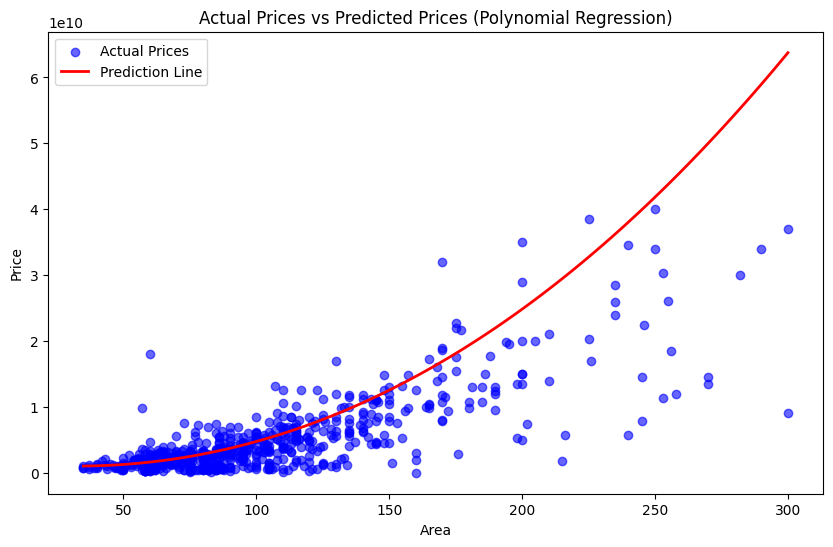

In [60]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model = LinearRegression()
model.fit(X_poly_train, y_train)
y_pred = model.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')
X_range = np.linspace(X_test['Area'].min(), X_test['Area'].max(), 100)
X_base = X_test.iloc[0:1].copy()
X_dummy = pd.concat([X_base]*100, ignore_index=True)
X_dummy['Area'] = X_range.flatten()
X_range_poly = poly.transform(X_dummy)
y_range_pred = model.predict(X_range_poly)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Area'], y_test, color='blue', label='Actual Prices', alpha=0.6)
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Prediction Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices (Polynomial Regression)')
plt.legend()